In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt

In [2]:
#Define variables
key = [0,0,0,0,0,0,0,0,0,1]
m = len(key)
N = 2**m-1
Mseq = []

In [3]:
#Generate entire sequence(Q1)
state = key.copy()
for _ in range(N):
    new = state[-1]^state[-4]
    Mseq.append(state[-1])
    state = state[-1:]+state[:-1]
    state[0] = new

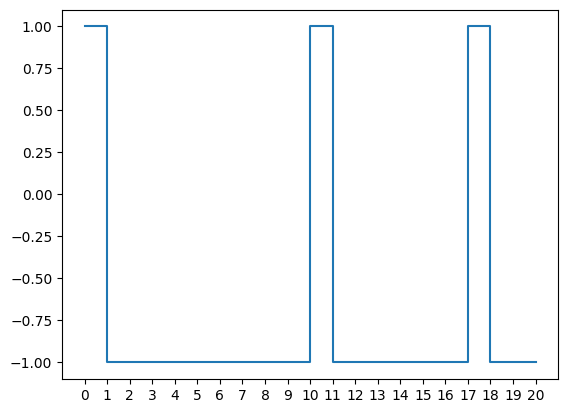

In [4]:
#Plot bipolar sequence
Bipseq = 2*np.array(Mseq)-1
y = np.concatenate((Bipseq[:1],Bipseq[:20]))
plt.step(range(21),y)
plt.xticks(range(21))
plt.show()

In [5]:
#Print number of 0 and 1(Q1)
N1 = np.sum(Mseq)
N0 = len(Mseq)-N1
print("N0 =",N0,"; N1 =",N1)

N0 = 511 ; N1 = 512


In [6]:
#Compute number of runs(Q3)
n0 = [0]*(m-1)
n1 = [0]*m
n = [n0,n1]

def a(list,v,l,n):
    if len(list)==0:
        n[v][l-1] += 1
        return n
    else:
        next = list[0]
        if next == v:
            return a(list[1:],next,l+1,n)
        else:
            n[v][l-1] += 1
            return a(list[1:],next,1,n)

c = a(Mseq[1:],Mseq[0],1,n)

In [7]:
c0 = c[0]+[0]
n = [a+b for a,b in zip(c0,c[1])]
print("Number of runs of of length 1 to 10:",n)
print("Number of runs of zeros of length 1 to 9:",c[0])
print("Number of runs of ones of length 1 to 10:",c[1])

Number of runs of of length 1 to 10: [256, 128, 64, 32, 16, 8, 4, 2, 1, 1]
Number of runs of zeros of length 1 to 9: [128, 64, 32, 16, 8, 4, 2, 1, 1]
Number of runs of ones of length 1 to 10: [128, 64, 32, 16, 8, 4, 2, 1, 0, 1]


In [8]:
#Periodic autocorrelation function(Q6)
def per_auto_corr(bipseq,t):
    return np.sum(bipseq*np.concatenate((bipseq[-t:],bipseq[:-t])))


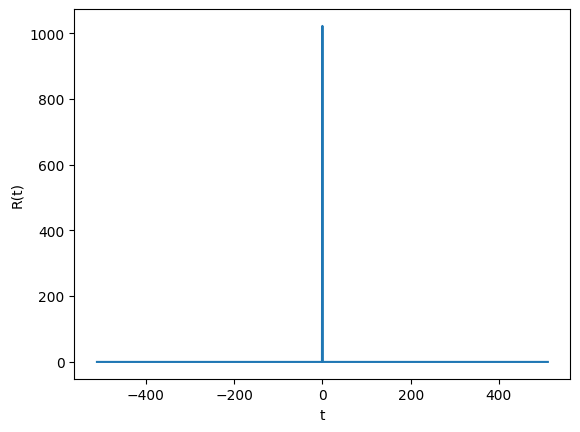

In [9]:
#Plot periodic autocorrelation
x = range(-(N-1)//2,(N-1)//2+1)
R = [per_auto_corr(Bipseq,t) for t in x]
plt.plot(x,R)
plt.xlabel("t")
plt.ylabel("R(t)")
plt.show()

In [10]:
print("R(0) =",per_auto_corr(Bipseq,0))
print("R(-1) =",per_auto_corr(Bipseq,-1))

R(0) = 1023
R(-1) = -1


In [11]:
#Compute the primitive polynomial of an LFSR given a fraction of the key(Q7)
key = [1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0]
n = len(key)
m = 3
while m<=20:
    b = key[m:2*m]
    A = [key[i:m+i] for i in range(m)]
    try:
        AI = Matrix(A).inv_mod(2)
        p = (np.array(AI)@b)%2
        seq = []
        for i in range(2*m,n):
            new = (p@key[i-m:i])%2
            seq.append(new)
        if seq == key[2*m:]:
            print(m)
            break
    except:
        print("Incorrect value of m:A has no mod 2 inverse: m =",m)
    m += 1


Incorrect value of m:A has no mod 2 inverse: m = 5
Incorrect value of m:A has no mod 2 inverse: m = 7
Incorrect value of m:A has no mod 2 inverse: m = 8
Incorrect value of m:A has no mod 2 inverse: m = 9
Incorrect value of m:A has no mod 2 inverse: m = 10
Incorrect value of m:A has no mod 2 inverse: m = 11


Incorrect value of m:A has no mod 2 inverse: m = 14
Incorrect value of m:A has no mod 2 inverse: m = 15
Incorrect value of m:A has no mod 2 inverse: m = 18
19


In [12]:
#Compute variables necessary to generate new symbols
m = 19
b = key[m:2*m]
#print(b)
A = [key[i:m+i] for i in range(m)]
#print(A)
AI = Matrix(A).inv_mod(2)
#print(AI)
p = (np.array(AI)@b)%2
#print(p)
seq = []
for i in range(2*m,n):
    new = (p@key[i-m:i])%2
    seq.append(new)
print(seq==key[2*m:])

True


In [14]:
print("Coefficients of the primitive polynomial:",p)

Coefficients of the primitive polynomial: [1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [13]:
#Generate next symbols(Q8)
next20 = key.copy()
for i in range(20):
    next20.append((p@next20[n-m+i:n+i])%2)

print("Full sequence:",next20)
print("Next 20 symbols:",next20[n:])

Full sequence: [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
Next 20 symbols: [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
